# PHYS-E0412 Computational Physics - Homework 2
Ari Viitala
432568

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from subprocess import Popen, PIPE
from IPython.display import Image

### Answers

(i)

<img src="data.png" width="600px">

(ii) $\alpha \approx 0.318$

(iii) $\beta \approx 0.507$

(iv) 

<img src="collapse.png" width="600px">

In [68]:
#function for running the fortran code on the command line for different input values
def run_simulation(modified, L, drops, runs):
    params = [modified, str(L), str(drops), str(runs)]
    params = "\n".join(params)

    with Popen("./RD_hw", stdin = PIPE, stdout = PIPE) as run:
        run.communicate(params.encode())

    result = np.loadtxt("modified_w_average" + str(L) + ".txt")
    
    #plotting the check return value. was used for testing
    plt.loglog(result[:,0], result[:,1])

10
20
30
50
70
100
150
200
300
400
500


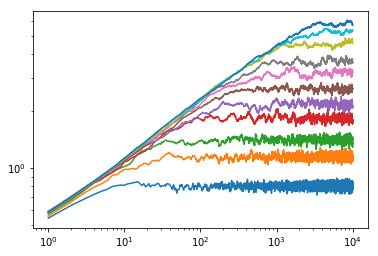

In [78]:
#L values used for simulation
drops = 10000
runs = 100
ls = [10, 20, 30, 50, 70, 100, 150, 200, 300, 400, 500]

#iterating over L values and running the simulation 
for i in ls:
    print(i)
    run_simulation("true", i, drops, runs)

In [289]:
#loading data from the text files produced by the fortran script and storing them in a numpy array
data = [np.loadtxt("modified_w_average" + str(i) + ".txt") for i in ls]
data = np.array(data)
data.shape

(11, 10000, 2)

### (i) A plot of the simulation results using log-log scale

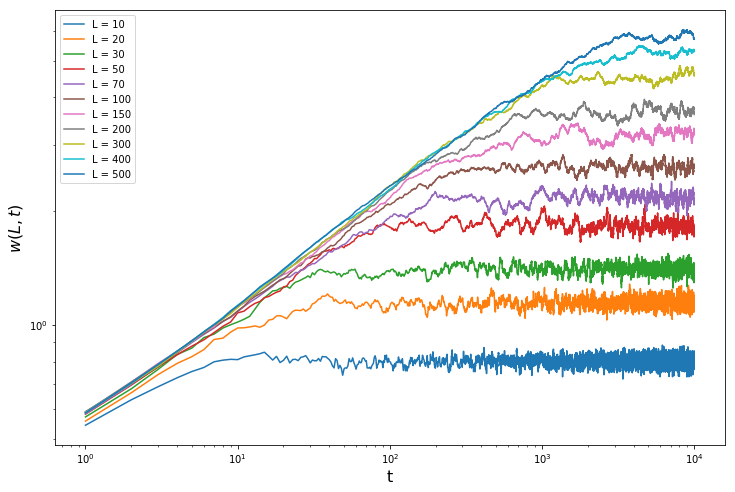

In [322]:
plt.figure(1, (12, 8))
for i in range(0, data.shape[0]):
    plt.loglog(data[i, :, 0], data[i, :, 1], label = "L = " + str(ls[i]))

plt.xlabel("t", size = 16)
plt.ylabel("$w(L, t)$", size = 16)
plt.legend()
plt.savefig("data.png")
plt.show()

It seems that the higher the $L$ value the longer it takes for the roughness to stabilize. The growth seems to be exponential before the roughness levels off as the log-log plot is linear. 

### (ii) Early roughness exponent

In [192]:
xs = []
ys = []

for i in range(0, len(ls)):
    xs.append(np.log10(data[i, :ls[i] / 2, 0]))
    ys.append(np.log10(data[i, :ls[i] / 2, 1]))
    

In [193]:
xs = np.hstack(xs)
ys = np.hstack(ys)

In [291]:
beta, beta_0 = np.polyfit(xs, ys, 1)
beta

0.3184089692798689

Looking at the plot reveals that the growth of the roughness functions is linear at least up to $t = \frac{L}{2}$ so we take the first $\frac{L}{2}$ values of each simulation and then fit a line through them. This puts less emhaphasis on smaller $L$ simultions but they all seem to agree pretty well so this probably isn't a huge crime. 

Doing this reveals that the line fitted to the points has a slope of 0.318. Hence the value $\beta = 0.318$.

In [292]:
tbeta_x = np.linspace(1, 10000, 10000)
#here the line is also translated with the y-axis intersection of the linear fit
tbeta = tbeta_x**beta * 10**beta_0

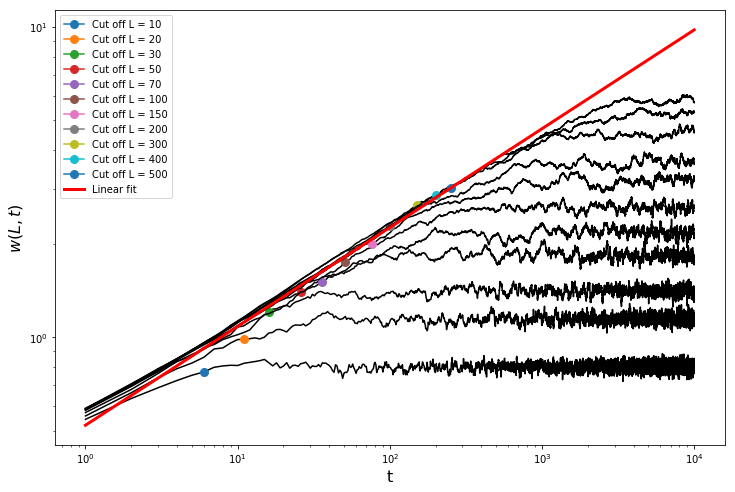

In [296]:
plt.figure(1, (12, 8))
for i in range(0, data.shape[0]):
    #plotting the data in black
    plt.loglog(data[i, :, 0], data[i, :, 1], color = "k")
    #plotting the cut off points
    plt.loglog(data[i,int(ls[i] / 2), 0], data[i, int(ls[i] / 2), 1], 
               marker = "o", 
               markersize = 8, 
               label = "Cut off L = " + str(ls[i]))

#plotting the linear fit
plt.loglog(tbeta_x, tbeta, linewidth = 3, color = "r", label = "Linear fit")

plt.xlabel("t", size = 16)
plt.ylabel("$w(L, t)$", size = 16)
plt.legend()
plt.show()

In this plot we can see the linear fit as well as the cut off points, up to which, the simulation values were considered for the fitting of the line for each simulation. We see that the linear fit agrees pretty well with the data.

### (iii) Saturation width exponent
For each simulation at least the last 5000 points seem to be stabilized and we take the mean of these to get the steady state roughness for each L.

In [303]:
Ls = np.mean(data[:,-5000:,1], 1)

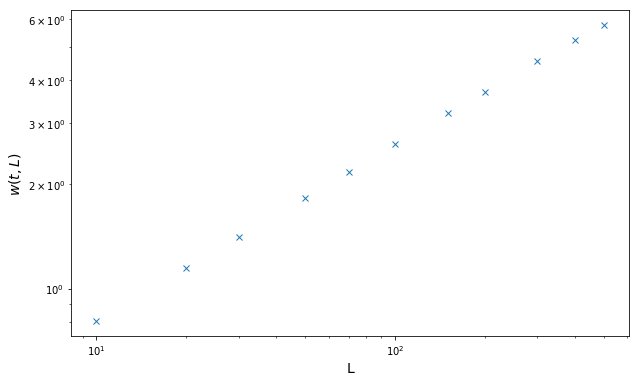

In [298]:
plt.figure(1, (10,6))
plt.loglog(ls, Ls, marker = "x", linestyle = "None")
plt.xlabel("L", size = 14)
plt.ylabel("$w(t,L)$", size = 14)
plt.show()

Again the values seem to behave linearly in a log-log plot.

Now we can again fit a linear model to these points. Here the use of mean before fitting could be questionable in some cases. However, we have such a large set of points that seem to be distributed evenly so this shouldn't cause any bias and this simplifies some calculations. 

In [304]:
alfa, alfa_0 = np.polyfit(np.log10(ls), np.log10(Ls), 1)
alfa

0.5065960367476727

The slope of the line is approximately 0.507, hence, $\alpha = 0.507$. Here the use of mean is again 

In [305]:
L = np.linspace(10, 500, 100)
Lalfa = L**alfa * 10**alfa_0

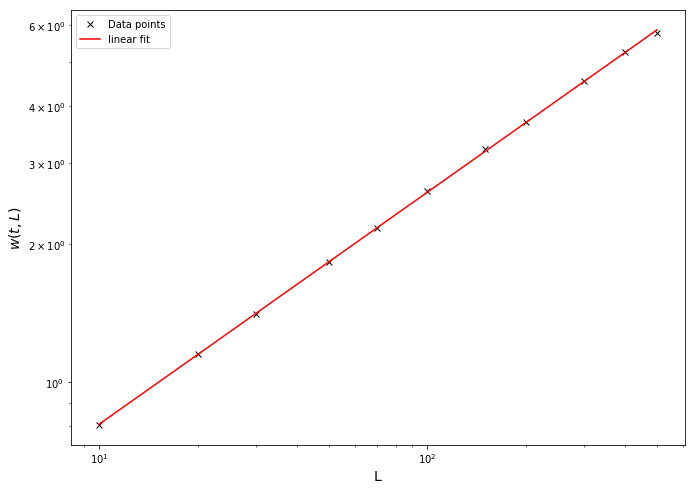

In [301]:
plt.figure(1, (11, 8))
plt.loglog(ls, Ls, marker = "x", linestyle = "None", color = "k", label = "Data points")
plt.loglog(L, Lalfa, color = "r", label = "linear fit")

plt.xlabel("L", size = 14)
plt.ylabel("$w(t,L)$", size = 14)
plt.legend()
plt.show()

### (iv) Data collapse
If we scale the $w(t, L)$ values with $L^\alpha$ and the x-axis with $L^\frac{\alpha}{\beta}$ we see that all the simulation result agree with each other. This can be seen as a "collapse" of different results into one.

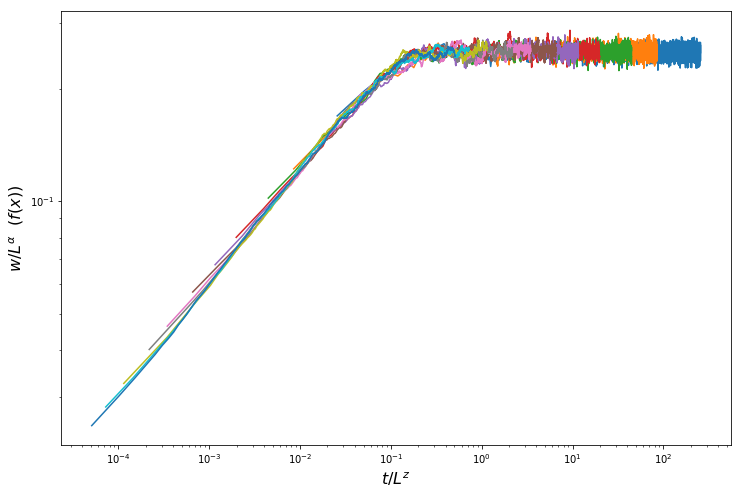

In [323]:
plt.figure(1, (12,8))

for i in range(0, len(ls)):
    plt.loglog(data[i, :, 0]  / ls[i]**(alfa / beta), data[i, :, 1] / ls[i]**alfa)

plt.xlabel("$t / L^z$" , size = 16)
plt.ylabel(r"$w / L^\alpha$  ($f(x)$)", size = 16)
plt.savefig("collapse.png")
plt.show()

### (iv) Time spent
This exercise took about 6 hours to complete.